In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of principal components selected: 2

In [ ]:
pca = PCA(n_components = 2)
#fitting the model to the data with the selected number of components
pca.fit_transform(X)
scores_pca = pca.transform(X)

In [ ]:
#fit KMeans using the transformed data from the PCA
wcss=[]
for i in range(2,11):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans_pca.fit(scores_pca)
  cluster_labels = kmeans_pca.labels_
  silhouette = silhouette_score(scores_pca, cluster_labels)
  calinski = calinski_harabasz_score(scores_pca, cluster_labels)
  davies = davies_bouldin_score(scores_pca, cluster_labels)
  wcss.append(kmeans_pca.inertia_)

  # Count points in each cluster
  cluster_sizes = np.bincount(cluster_labels)
  cluster_percentages = (cluster_sizes / len(cluster_labels)) * 100

  print(f"Number of clusters: {i}")
  print("Percentage of points in each cluster:", end=" ")
  for j, percentage in enumerate(cluster_percentages):
        print(f"Cluster {j}: {percentage:.1f}%", end=" ")
  print()  # New line after percentages
  print(f"Silhouette Coefficient: {silhouette:.4f}",
          f"Calinski-Harabasz Index: {calinski:.4f}",
          f"Davies-Bouldin Index: {davies:.4f}")
  print("-" * 50)  # Add a separator line between iterations

Number of clusters: 2
Percentage of points in each cluster: Cluster 0: 50.2% Cluster 1: 49.8% 
Silhouette Coefficient: 0.5592 Calinski-Harabasz Index: 134729.7460 Davies-Bouldin Index: 0.6499
--------------------------------------------------
Number of clusters: 3
Percentage of points in each cluster: Cluster 0: 32.7% Cluster 1: 46.0% Cluster 2: 21.2% 
Silhouette Coefficient: 0.4785 Calinski-Harabasz Index: 113091.1129 Davies-Bouldin Index: 0.7450
--------------------------------------------------
Number of clusters: 4
Percentage of points in each cluster: Cluster 0: 25.6% Cluster 1: 45.4% Cluster 2: 20.7% Cluster 3: 8.3% 
Silhouette Coefficient: 0.4549 Calinski-Harabasz Index: 87230.4557 Davies-Bouldin Index: 0.8045
--------------------------------------------------
Number of clusters: 5
Percentage of points in each cluster: Cluster 0: 22.7% Cluster 1: 29.7% Cluster 2: 20.5% Cluster 3: 7.9% Cluster 4: 19.1% 
Silhouette Coefficient: 0.4518 Calinski-Harabasz Index: 105391.8735 Davies-Bo

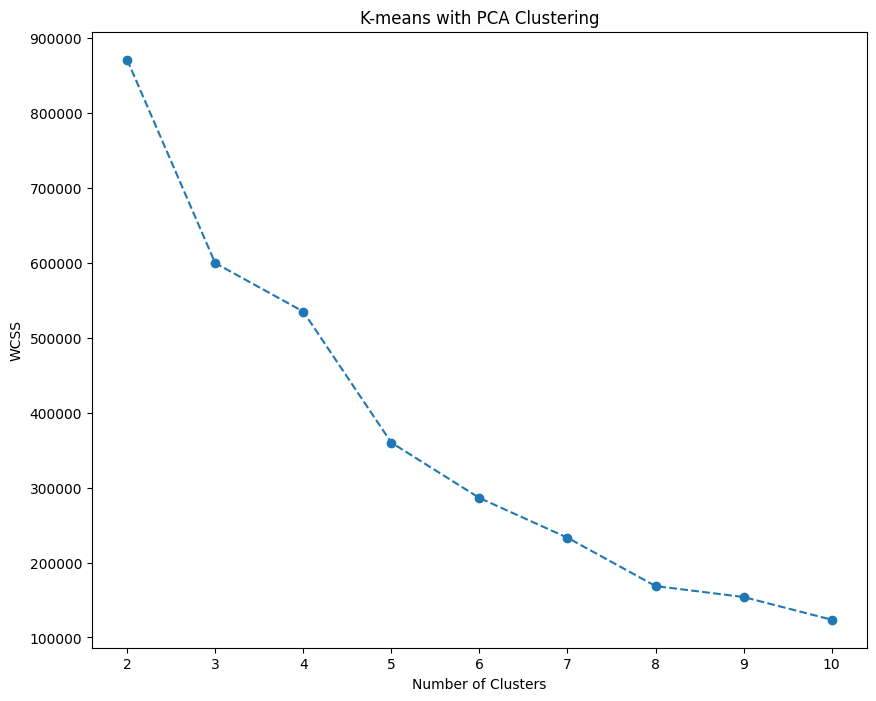

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(2,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Number of clusters selected: 2

In [ ]:
#Kmeans run with the selected number of clusters
#initialize with the random state
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
#fitting the data with the kmeans pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [ ]:
#new data frame is created with the original features and adding the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
#last added column contains the pca kmeans clustering labels
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

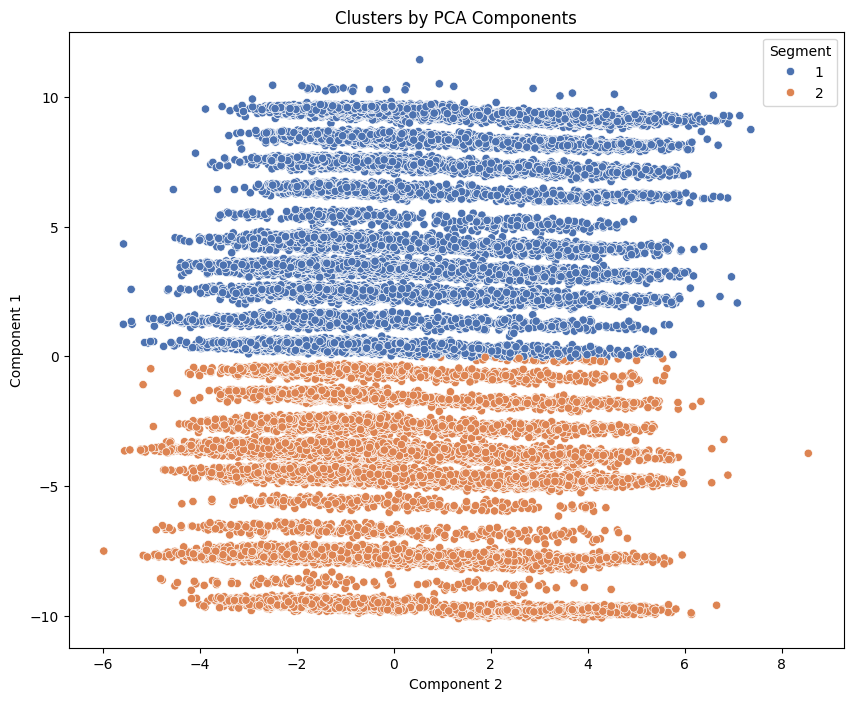

In [ ]:
#create a new column named 'Segment' and map the added clustering direclty inside it
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'1', 1:'2'})

#plotting the data by pca components. The Y axis is the 1st component, X axis is the 2nd
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette="deep")
plt.title('Clusters by PCA Components')
plt.show()

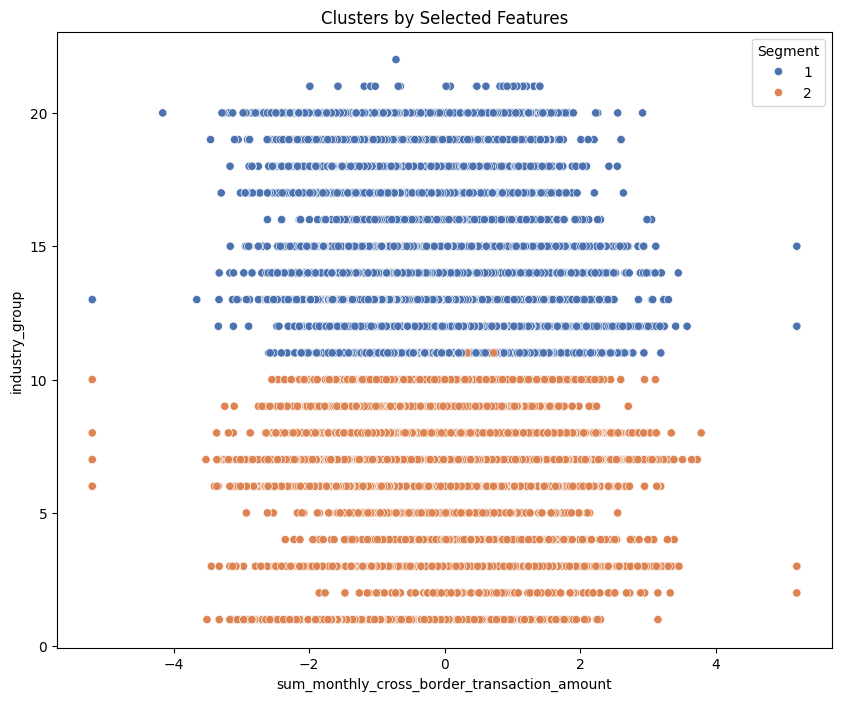

In [ ]:
# Adding actual feature names
x_axis = df['sum_monthly_cross_border_transaction_amount']
y_axis = df['industry_group']

plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette="deep")
plt.title('Clusters by Selected Features')
plt.xlabel('sum_monthly_cross_border_transaction_amount')
plt.ylabel('industry_group')
plt.show()